In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import os
import numpy as np
from tqdm import tqdm
from random import shuffle
import cv2


def get_label(file_name):

    if file_name == 'buildings':
        return 0
    if file_name == 'forest':
        return 1
    if file_name == 'glacier':
        return 2
    if file_name == 'mountain':
        return 3
    if file_name == 'sea':
        return 4
    else:
        return 5


def getting_train_data():

    training_data = []
    TRAIN_DATA_DIR = "../input/intel-image-classification/seg_train/seg_train"

    for image_folder in os.listdir(TRAIN_DATA_DIR):
        for images in os.listdir(os.path.join(TRAIN_DATA_DIR, image_folder)):
            label = get_label(image_folder)
            image = cv2.imread(TRAIN_DATA_DIR + "/" +
                               image_folder + "/" + images)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (100, 100))
            training_data.append([np.array(image), label])
    shuffle(training_data)
    np.save('intel_training_data.npy', training_data, allow_pickle=True)
    return training_data


def getting_test_data():

    testing_data = []
    TEST_DATA_DIR = "../input/intel-image-classification/seg_test/seg_test"

    for image_folder in os.listdir(TEST_DATA_DIR):
        for image in os.listdir(os.path.join(TEST_DATA_DIR, image_folder)):
            label = get_label(image_folder)
            image = cv2.imread(TEST_DATA_DIR + "/" +
                               image_folder + "/" + image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (100, 100))
            testing_data.append([np.array(image), label])

    shuffle(testing_data)
    np.save('intel_testing_data.npy', testing_data, allow_pickle=True)
    return testing_data


train_data = getting_train_data()
test_data = getting_test_data()


In [4]:
X = np.array([i[0] for i in train_data])
y = np.array([i[1] for i in train_data])

test_x = np.array([i[0] for i in test_data])
test_y = np.array([i[1] for i in test_data])

In [6]:
#  ALEXNET IMPLEMENTATION

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot


model = Models.Sequential()

model.add(Layers.Conv2D(96,kernel_size=(11,11),strides =4 ,padding='same', activation='relu',input_shape=(100,100,3)))
model.add(Layers.MaxPool2D(pool_size=3,strides=2))
model.add(Layers.Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(Layers.MaxPool2D(pool_size=3,strides=2))
model.add(Layers.Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Layers.Conv2D(384,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Flatten())
model.add(Layers.Dense(4096,activation='relu'))
model.add(Layers.Dense(4096,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.8))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)        

In [7]:
trained = model.fit(X,y,epochs=35,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 10s 974us/sample - loss: 1.2495 - accuracy: 0.5145 - val_loss: 0.9362 - val_accuracy: 0.6588
Epoch 2/35
9823/9823 [==============================] - 4s 439us/sample - loss: 0.8781 - accuracy: 0.6706 - val_loss: 0.8456 - val_accuracy: 0.6896
Epoch 3/35
9823/9823 [==============================] - 4s 436us/sample - loss: 0.7464 - accuracy: 0.7301 - val_loss: 0.7054 - val_accuracy: 0.7488
Epoch 4/35
9823/9823 [==============================] - 4s 435us/sample - loss: 0.6810 - accuracy: 0.7602 - val_loss: 0.7088 - val_accuracy: 0.7428
Epoch 5/35
9823/9823 [==============================] - 4s 438us/sample - loss: 0.5729 - accuracy: 0.8025 - val_loss: 0.6773 - val_accuracy: 0.7613
Epoch 6/35
9823/9823 [==============================] - 4s 432us/sample - loss: 0.4915 - accuracy: 0.8303 - val_loss: 0.6537 - val_accuracy: 0.7756
Epoch 7/35
9823/9823 [==============================] - 4s 437u

In [13]:
trained.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

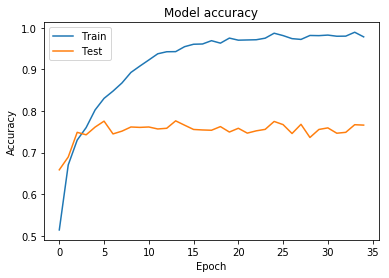

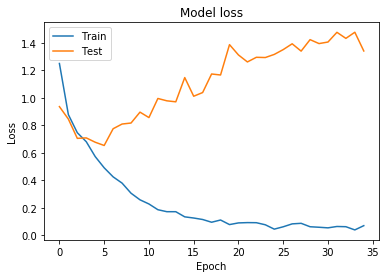

In [14]:
import matplotlib.pyplot as plt
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
model.evaluate(test_x,test_y, verbose=2)

3000/1 - 0s - loss: 1.2217 - accuracy: 0.7630


[1.33207408618927, 0.763]

In [ ]:
pred_images,no_labels = get_images('../input/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape